In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
df_raw = df.copy()
df['class'] = df['class'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    class  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


<Axes: >

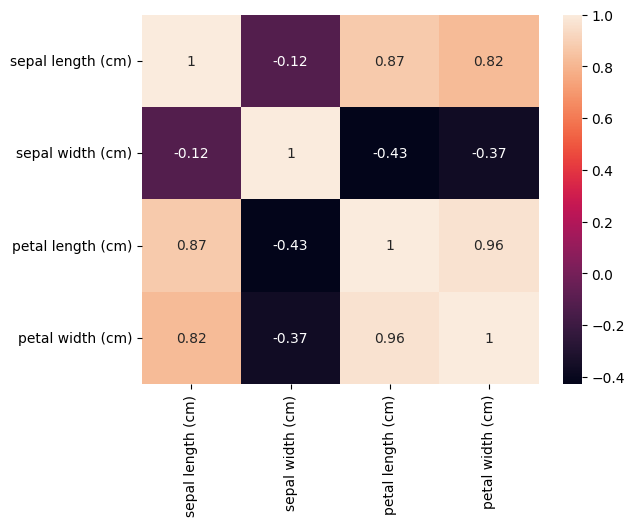

In [ ]:
corr_all = df.drop('class', axis=1).corr()
# print(corr_all)

sns.heatmap(corr_all, annot=True)

<Axes: ylabel='class-None'>

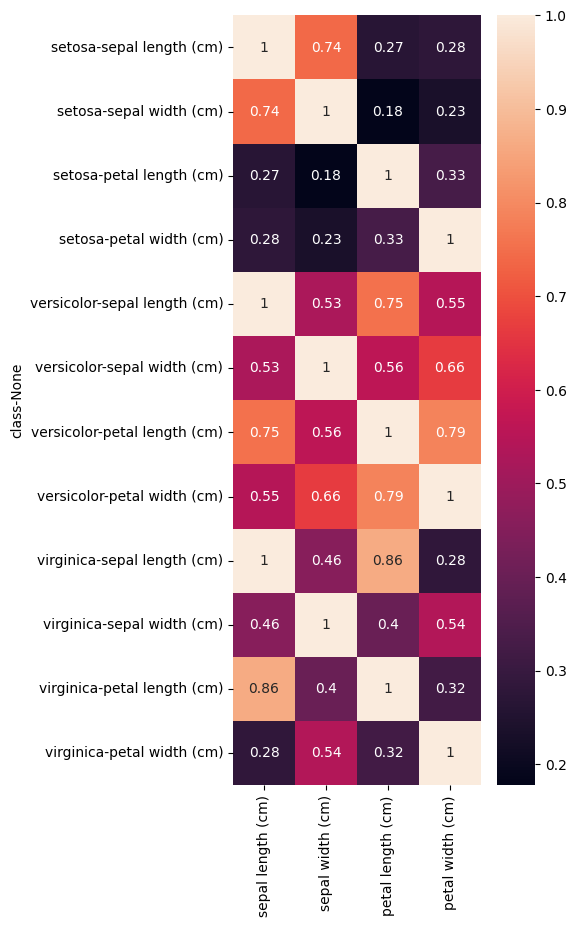

In [ ]:
corr_by_class = df.groupby('class').corr()
plt.figure(figsize=(4,10))
sns.heatmap(corr_by_class, annot=True)
# print(corr_by_class)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


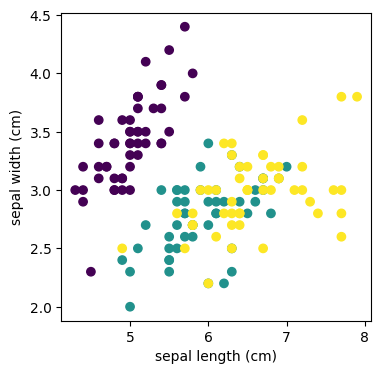

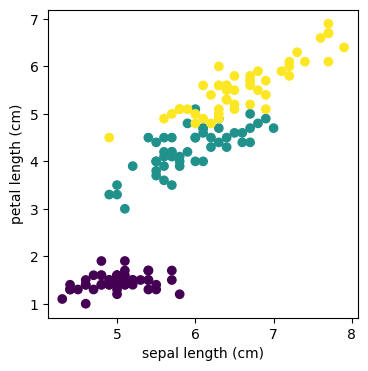

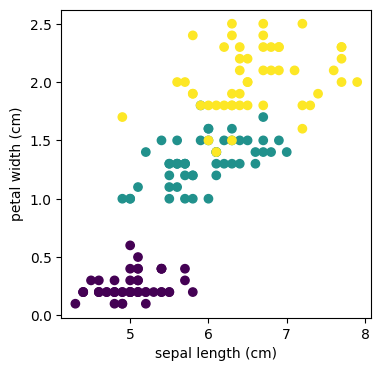

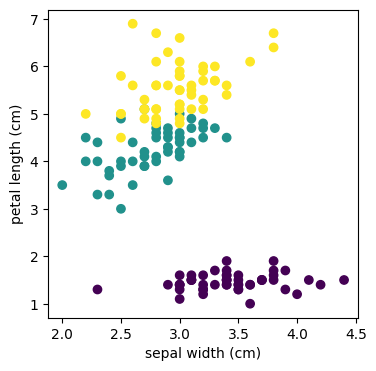

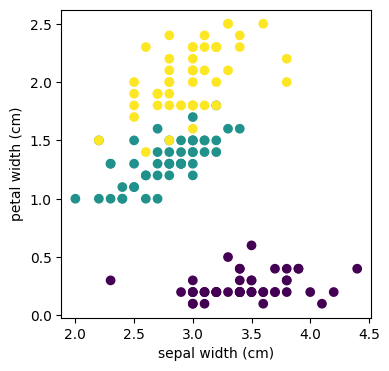

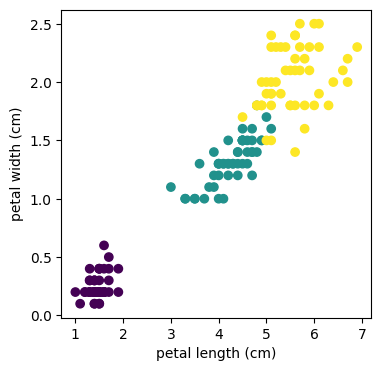

In [ ]:
features = df_raw.columns[:-1]

for i, f1 in enumerate(df_raw.columns):
    for f2 in features[i:]:
        if f1 == f2:
            continue
        plt.figure(figsize=(4, 4))
        plt.scatter(x=df_raw[f1], y=df_raw[f2], c=df_raw['class'])
        plt.xlabel(f1)
        plt.ylabel(f2)
        plt.show()


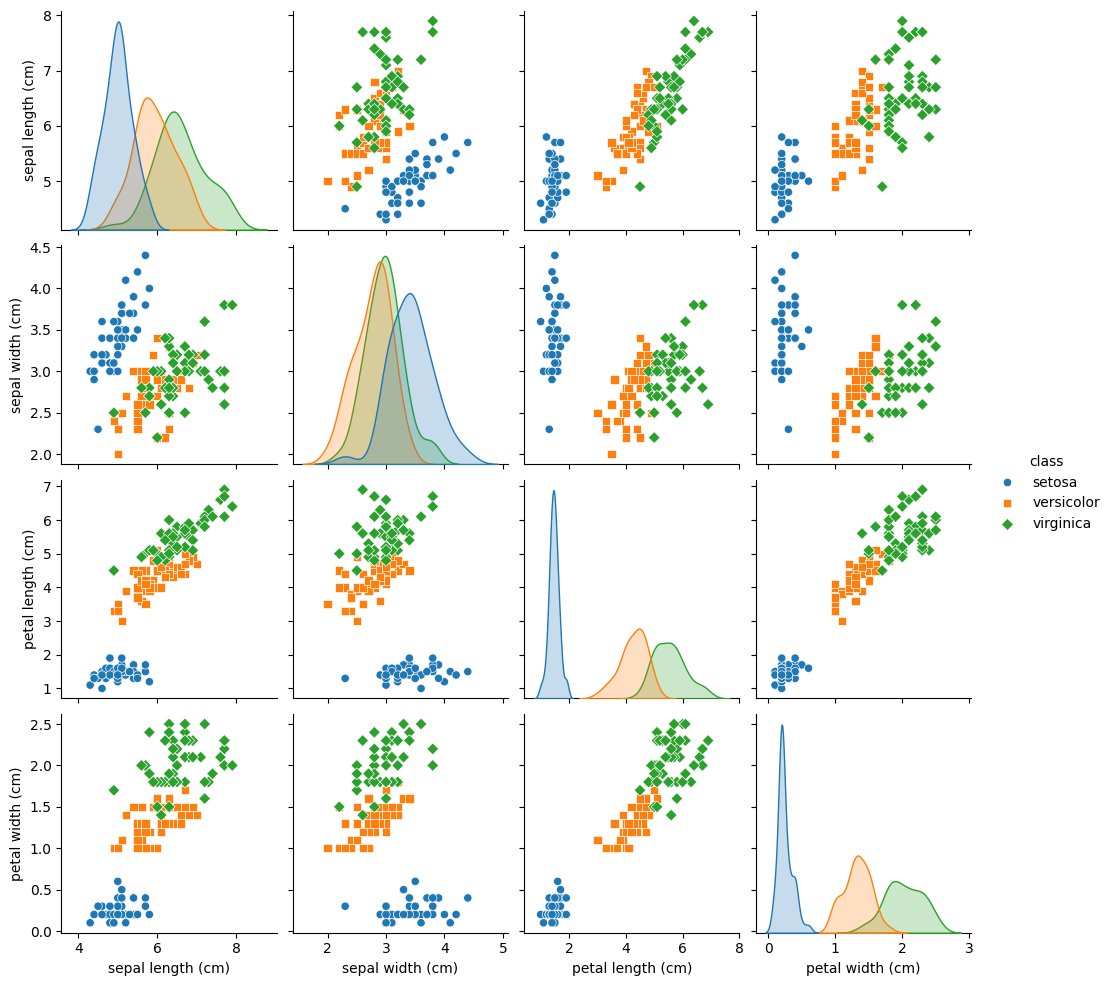

In [ ]:
sns.pairplot(df, hue='class', markers=['o', 's', 'D'])
plt.show()

In [ ]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('sepal length')
    plt.ylabel('petal length')
    plt.show()


--------------------------------------------------
Модель: LDA
--------------------------------------------------
Точность (Accuracy): 0.8444

Отчет по классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.80      0.62      0.70        13
   virginica       0.69      0.85      0.76        13

    accuracy                           0.84        45
   macro avg       0.83      0.82      0.82        45
weighted avg       0.85      0.84      0.84        45



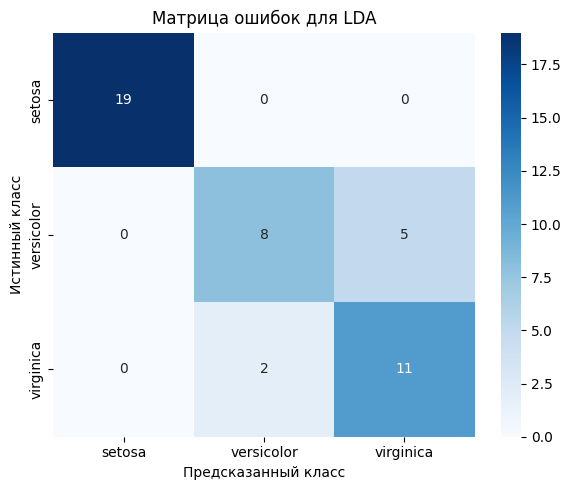

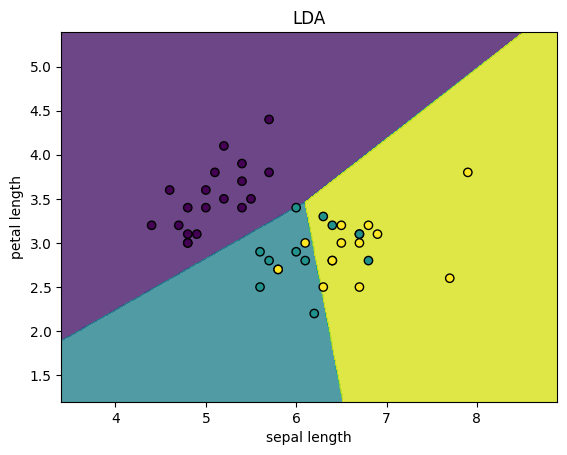


--------------------------------------------------
Модель: QDA
--------------------------------------------------
Точность (Accuracy): 0.8000

Отчет по классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.70      0.54      0.61        13
   virginica       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



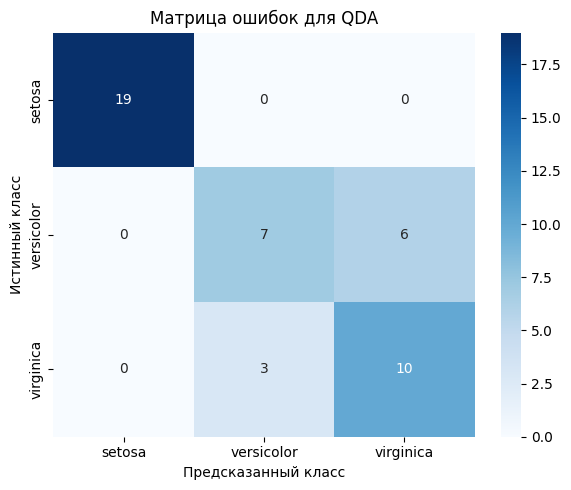

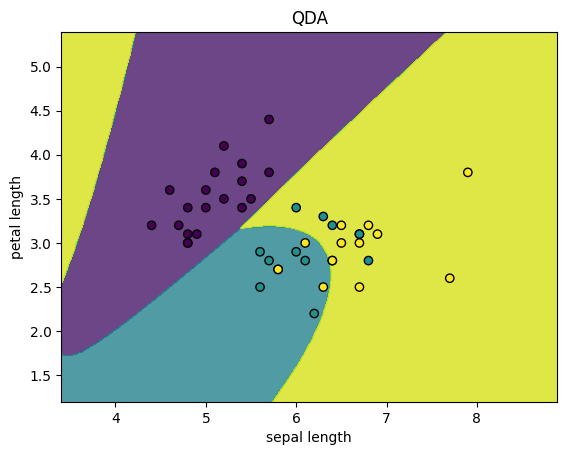


--------------------------------------------------
Модель: Logistic Regression
--------------------------------------------------
Точность (Accuracy): 0.8222

Отчет по классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.78      0.54      0.64        13
   virginica       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


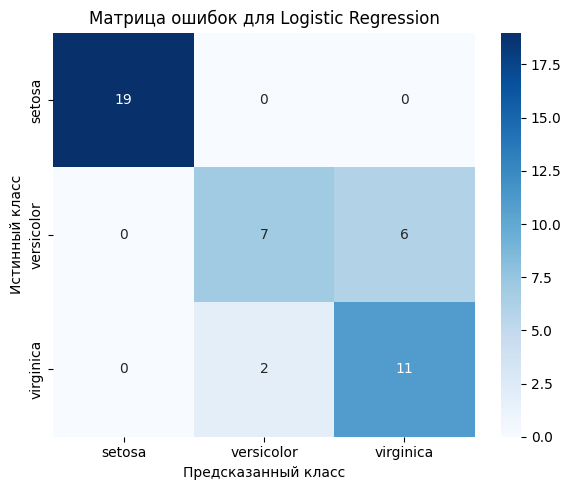

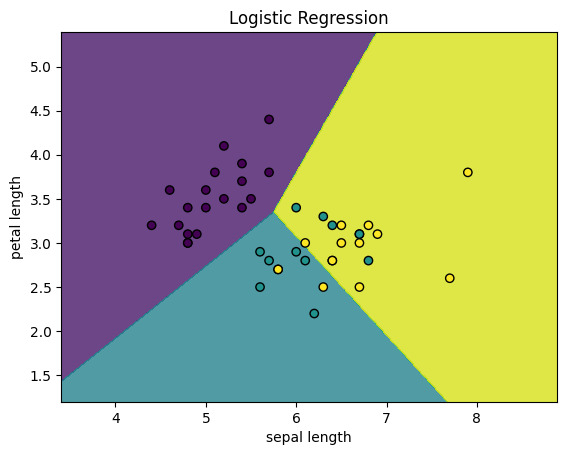


--------------------------------------------------
Модель: SVM Linear
--------------------------------------------------
Точность (Accuracy): 0.8000

Отчет по классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.70      0.54      0.61        13
   virginica       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



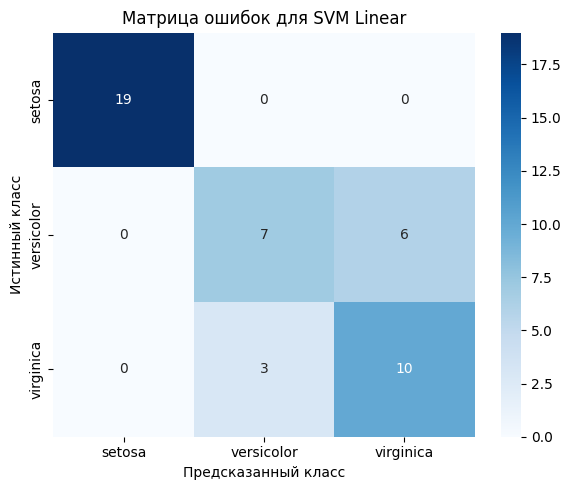

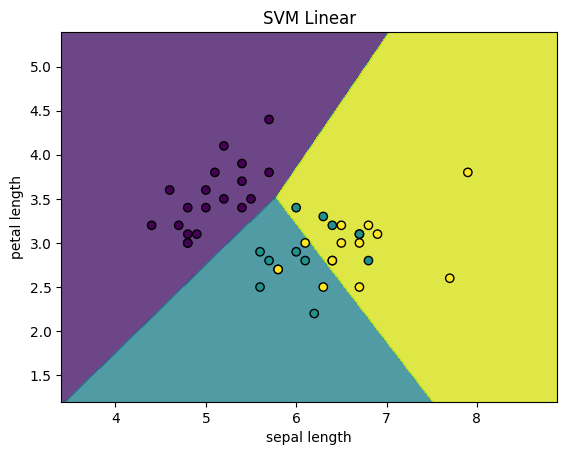


--------------------------------------------------
Модель: SVM RBF
--------------------------------------------------
Точность (Accuracy): 0.8000

Отчет по классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.70      0.54      0.61        13
   virginica       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



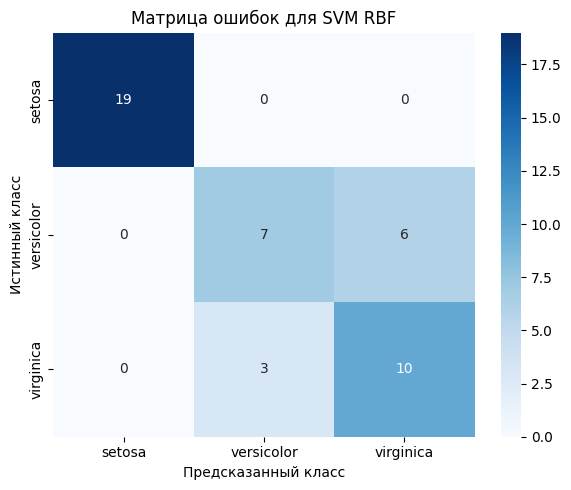

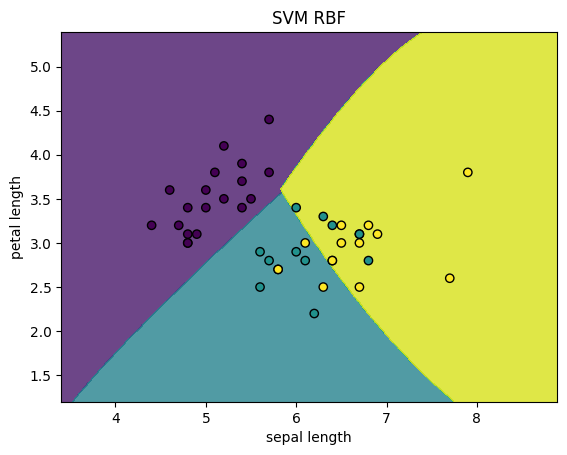

In [ ]:
models = {

    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', max_iter=200),
    'SVM Linear': SVC(kernel='linear'),
    'SVM RBF': SVC(kernel='rbf')
}

for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"Модель: {name}")
    print("-"*50)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Точность (Accuracy): {accuracy:.4f}")

    print("\nОтчет по классификации:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(f'Матрица ошибок для {name}')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')
    plt.tight_layout()
    plt.show()

    plot_decision_boundary(model, X_test, y_test, name)

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
mask = y != 0
X = X[mask]
y = y[mask] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

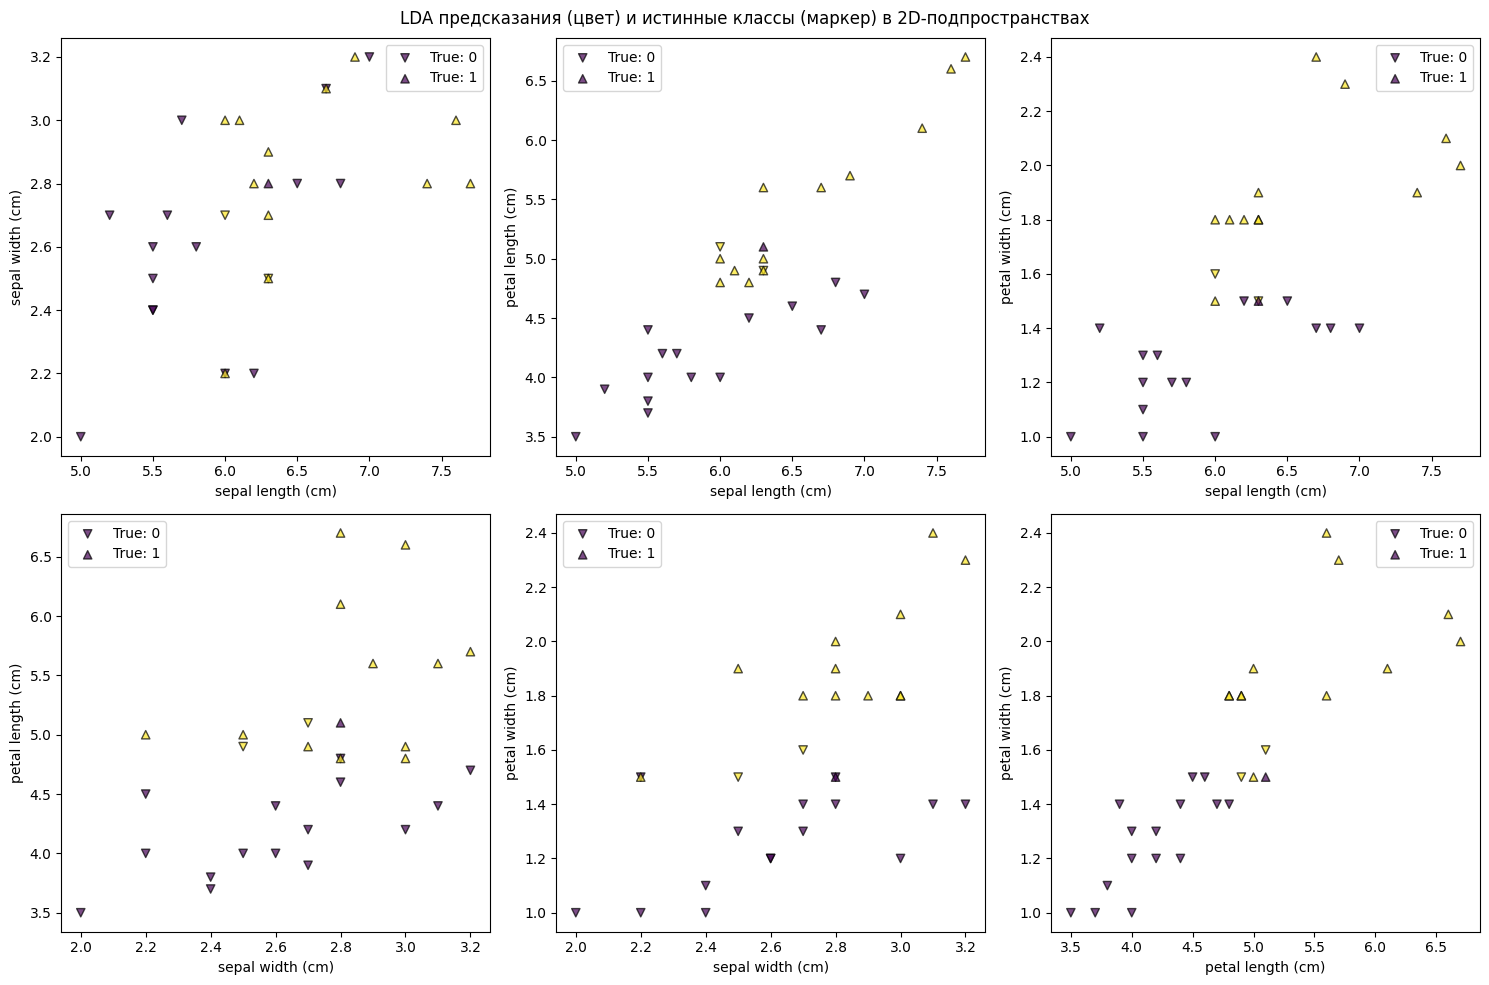

In [ ]:
features = df.columns[:-1]
pairs = list(itertools.combinations(range(4), 2))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

markers = ['v', '^']

for i, (idx1, idx2) in enumerate(pairs):
    ax = axes[i]
    for true_class in [0, 1]:
        mask = (y_test == true_class)
        ax.scatter(X_test[mask, idx1], X_test[mask, idx2], c=y_pred[mask], marker=markers[true_class],
                   label=f'True: {true_class}', alpha=0.7, edgecolor='k')
    ax.set_xlabel(features[idx1])
    ax.set_ylabel(features[idx2])
    ax.legend()

plt.suptitle("LDA предсказания (цвет) и истинные классы (маркер) в 2D-подпространствах")
plt.tight_layout()
plt.show()

In [ ]:
X = iris.data[:, :2]
y = iris.target
mask = y != 0
X = X[mask]
y = y[mask] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
classes = np.unique(y_train)
means = [np.mean(X_train[y_train == c], axis=0) for c in classes]
covs = [np.cov(X_train[y_train == c].T) for c in classes]
priors = [np.mean(y_train == c) for c in classes]

In [ ]:
def discriminant(x, mean, cov, prior):
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    diff = x - mean
    return -0.5 * np.dot(np.dot(diff.T, inv_cov), diff) - 0.5 * np.log(det_cov) + np.log(prior)

def predict_qda(X):
    discs = np.array([discriminant(x, means[c], covs[c], priors[c]) for c in classes for x in X])
    discs = discs.reshape((len(classes), len(X))).T
    return np.argmax(discs, axis=1)

In [ ]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
grid = np.c_[xx.ravel(), yy.ravel()]
Z_manual = predict_qda(grid).reshape(xx.shape)


--------------------------------------------------
Ручная реализация QDA
--------------------------------------------------
Точность (Accuracy): 0.6000

Отчет по классификации:
              precision    recall  f1-score   support

  versicolor       0.67      0.59      0.62        17
   virginica       0.53      0.62      0.57        13

    accuracy                           0.60        30
   macro avg       0.60      0.60      0.60        30
weighted avg       0.61      0.60      0.60        30



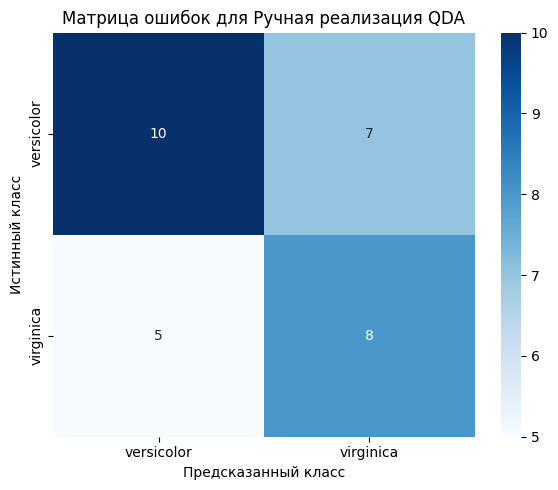


--------------------------------------------------
Sklearn QDA
--------------------------------------------------
Точность (Accuracy): 0.6000

Отчет по классификации:
              precision    recall  f1-score   support

  versicolor       0.67      0.59      0.62        17
   virginica       0.53      0.62      0.57        13

    accuracy                           0.60        30
   macro avg       0.60      0.60      0.60        30
weighted avg       0.61      0.60      0.60        30



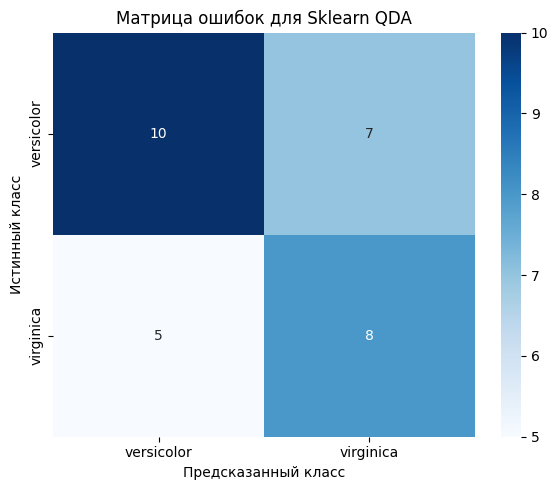

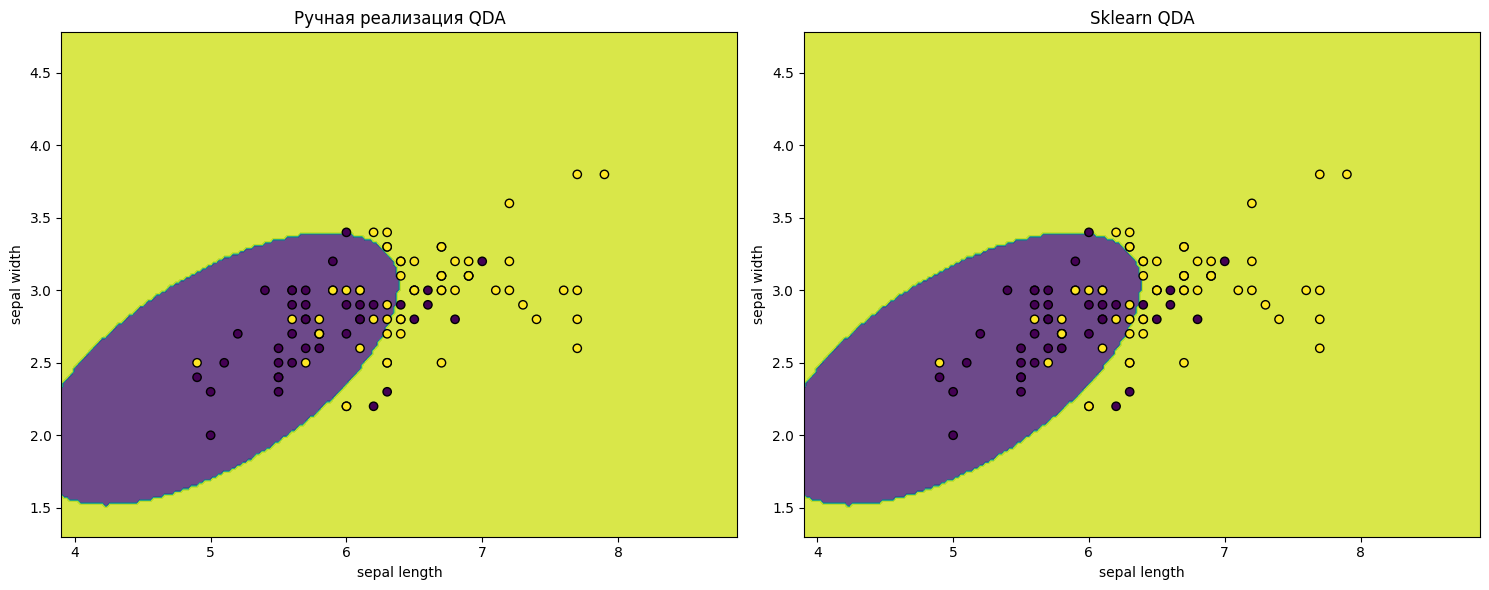

In [ ]:
y_pred_manual = predict_qda(X_test)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_sklearn = qda.predict(X_test)
Z_sklearn = qda.predict(grid).reshape(xx.shape)

def print_metrics(y_true, y_pred, title):
    print(f"\n{'-'*50}")
    print(f"{title}")
    print("-"*50)
    print(f"Точность (Accuracy): {accuracy_score(y_true, y_pred):.4f}")
    print("\nОтчет по классификации:")
    print(classification_report(y_true, y_pred, target_names=iris.target_names[1:]))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names[1:],
                yticklabels=iris.target_names[1:])
    plt.title(f'Матрица ошибок для {title}')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')
    plt.tight_layout()
    plt.show()

print_metrics(y_test, y_pred_manual, "Ручная реализация QDA")

print_metrics(y_test, y_pred_sklearn, "Sklearn QDA")

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_manual, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("Ручная реализация QDA")
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_sklearn, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("Sklearn QDA")
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.tight_layout()
plt.show()